#TIME SERIES ANALYSIS

#Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

##DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy. 

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


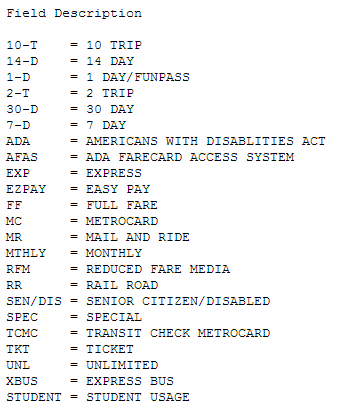

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

Each time series (per station, per ticket type) contains
the number of swipes per week for 194 weeks 
from 05/21/2010 to 02/21/2014. 

The data are available to you as a python data cube here:

you can load it as 

np.load(“MTA_Fare.npy") and 


you will end up with a python numpy array of 
shape (600,23,194)

##note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that! if you replace the -1 entries with NaN remember to use functions that can deal with nans:
np.nanmean
np.nansum...

#Task 1: 
##Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
##Identify it and figure out what it is due to.


#Task 2: 
##Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


#Task 3:
##Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


#EXTRA CREDIT: Cluster. 
##Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
##Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

##i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

##removing empty light curves
tots = tots[tots.std(1)>0]

##with Kmeans you have to choose the number of clusters ahead km = 

KMeans(n_clusters=10)

##and standardize the lightcurves before clustering
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

##then you can run:

km.fit(vals)

#HINTS: 

##When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average)


#Possibly useful functions

##I used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. 
##(But you do not have to use them! there are many ways to do things and you do not have to solve this problem like I did)

* the numpy function np.where() returns the index where a condition is true. it is slow and inefficient but very intuitive and convenient


* the numpy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
     
     np.fft.rfft(mydata) 
     
     will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

     np.fft.rfftfreq(N, d) 
     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)


*  the np.array.flatten() and np.array.reshape() allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series)



#Task 1

In [59]:
__author__ = 'fbb'
import pylab as pl
import pandas as pd
import os
import json
import numpy as np

s = json.load(open('fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [60]:
#after reading the datacube you should see:
mta = np.load('MTA_Fare.npy')
mta.shape
##600 stations,23 ticket types,194 weeks

(600, 23, 194)

ride types list

In [61]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [62]:
mta = mta.astype(float)

In [63]:
#replace -1 by nan
def drop(aaa):
    for i in range(len(aaa)):
        for j in range(len(aaa[0])):
            for k in range(len(aaa[0][0])):
                if aaa[i][j][k] == -1:
                    aaa[i][j][k] = nan

drop(mta)

In [64]:
#after I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

In [65]:
date = pd.date_range(start='05/21/2010', end='02/21/2014', freq='W')

In [69]:
#print (date.shape)
#print (np.log10(mta[i,j]).shape)

(194,)
(194,)


In [67]:
#drop first 2 data in date to make sure that x and y must have same first dimension
date = date[2:]

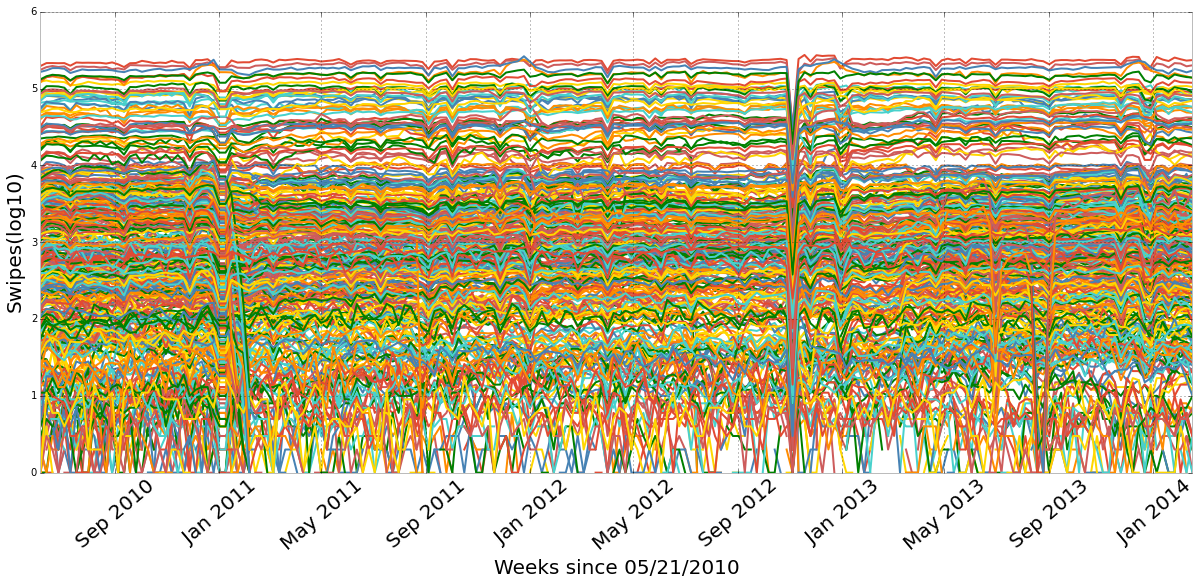

In [68]:
fig = figure(figsize=(20,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlabel('Weeks since 05/21/2010', size=20)
ax.set_ylabel('Swipes(log10)', size=20)
ax.tick_params(axis='x',labelsize=10)
pl.xticks(rotation=40, fontsize=20)

for i in range(len(mta[0])):
        for j in range(len(mta[1])):
            plt.plot(date,np.log10(mta[i,j]))
        

In [102]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mta.shape)
mta_allsum1 = np.nansum(mta, axis=0)
mta_allsum = np.nansum(mta_allsum1, axis=0)
print (mta_allsum.shape)
mta_allsum = pd.DataFrame(mta_allsum)

(600, 23, 194)
(194,)


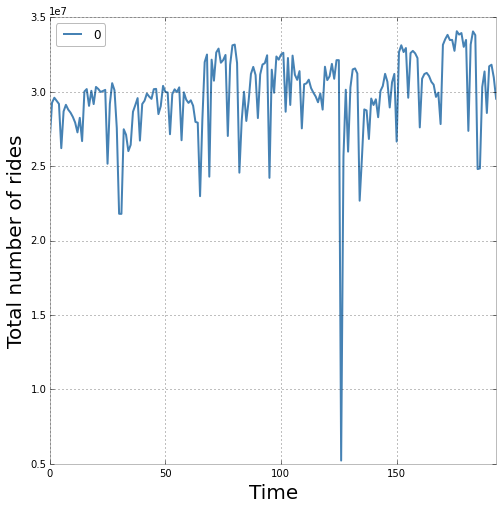

In [103]:
ax = mta_allsum.plot(figsize=(8,8))

pl.ylabel("Total number of rides", fontsize=20)
pl.xlabel("Time", fontsize=20)

In [104]:
#calculate the thresholds
thresholds = [mta_allsum.mean() - 3*mta_allsum.std(),
              mta_allsum.mean() + 3*mta_allsum.std()]
print thresholds

[0    20806307.166892
dtype: float64, 0    38756392.575376
dtype: float64]


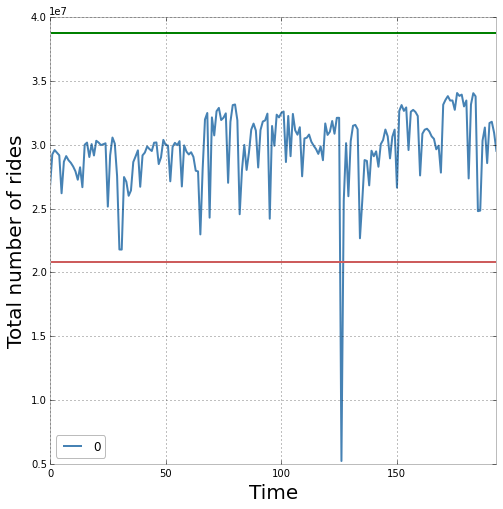

In [105]:
ax = mta_allsum.plot(figsize=(8,8))
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]])
pl.ylabel("Total number of rides", fontsize=20)
pl.xlabel("Time", fontsize=20)

In [118]:
mta_allsum.loc[(mta_allsum[0]<thresholds[0][0])]

0
126  5218686

In [120]:
mta_allsum.loc[(mta_allsum[0]<thresholds[0][0])] = nan

In [121]:
thresholds = [mta_allsum.mean() - 3*mta_allsum.std(),
              mta_allsum.mean() + 3*mta_allsum.std()]
print thresholds

[0    22659923.654712
dtype: float64, 0    37157311.464459
dtype: float64]


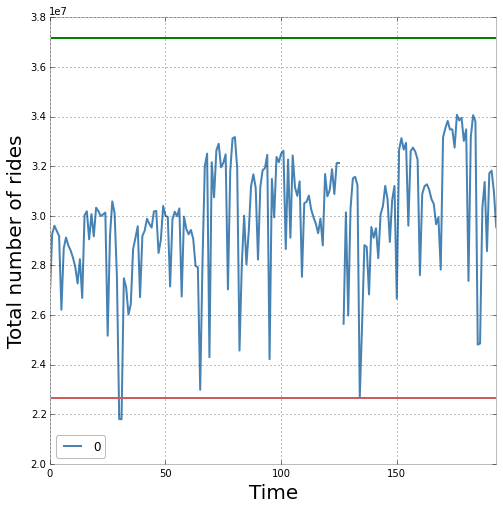

In [122]:
ax = mta_allsum.plot(figsize=(8,8))
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]])
pl.ylabel("Total number of rides", fontsize=20)
pl.xlabel("Time", fontsize=20)

In [123]:
mta_allsum.loc[(mta_allsum[0]<thresholds[0][0])]   

0
30  21802973
31  21796368

###The sudden drop in MTA fare in November 4, 2012 might be caused by the Hurricane Sandy

##NOTE ON THE TREND DETECTION:
###you should find the ride type that has the steepest increase, and the steepest decrease. notice: we are looking for something that has a more or less constant trend

###to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

###you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

###notice that you should inspect the time series, either algorithmically or by eye, to ensure you see a trend, and not just changing structure.


###below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

#Task 2

In [71]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm

In [72]:
mta_allsta = np.nansum(mta, axis=0)
print (mta_allsta.shape)

(23, 194)


In [73]:
mta_allsta_t = pd.DataFrame(mta_allsta.T)

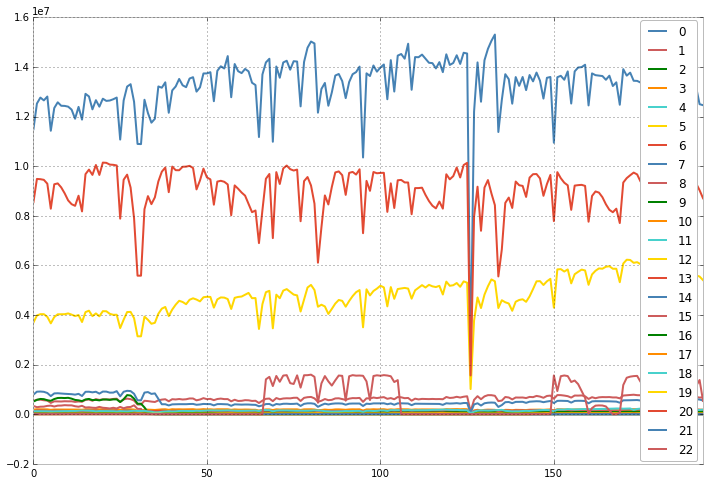

In [254]:
mta_allsta_t.plot(figsize=(12,8))
plt.legend(loc = 'right')

/Users/MISSZHOU/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


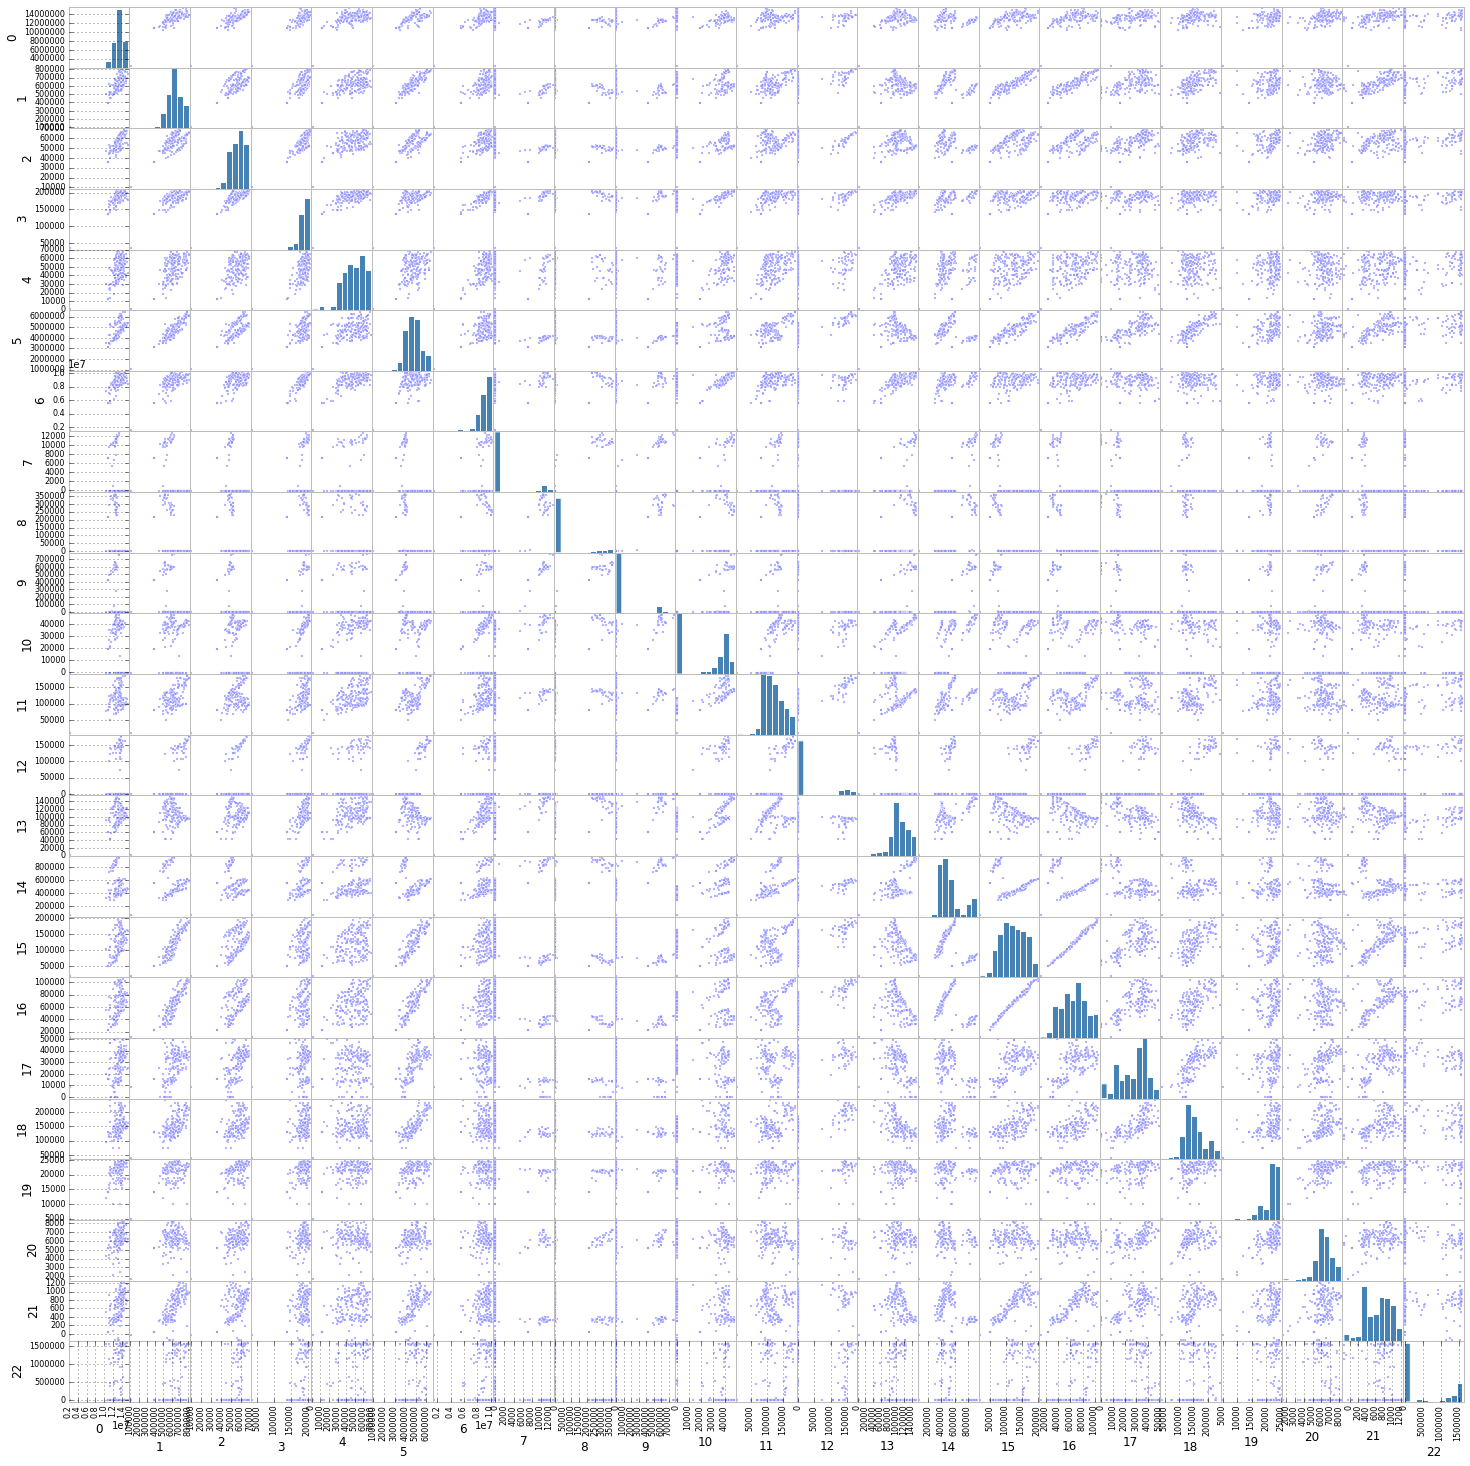

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(mta_allsta_t, figsize=(25,25));

std: 153167.095823
flux ratio beginning to end 1.53952557885


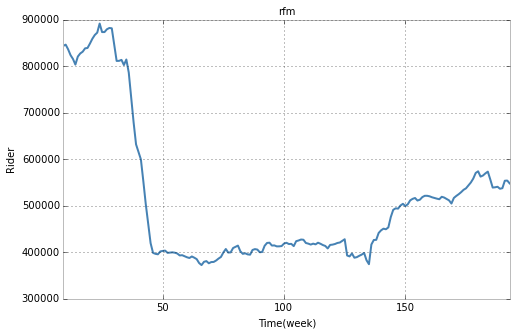

In [130]:
# The 2 examples
#rmf
roll_mean = pd.rolling_mean(mta_allsta_t[14], 10).dropna()
ax = roll_mean.plot(figsize=(8,5))
#roll_mean = pd.DataFrame(roll_mean)
ax.set_title(ridetype[14], fontsize=10)
pl.xlabel("Time(week)", fontsize=10)
pl.ylabel("Rider", fontsize=10)
pl.figure()

#print (roll_mean)

ratio = roll_mean[9]/roll_mean[193]
std = np.std(roll_mean)

print ('std:',std)
print ('flux ratio beginning to end',ratio)

std: 33307.6081244
flux ratio beginning to end 0.385156769744


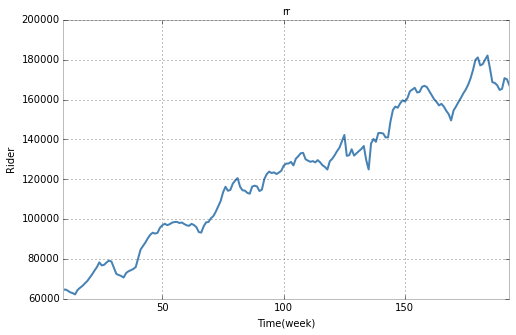

In [134]:
#rr
roll_mean = pd.rolling_mean(mta_allsta_t[15], 10).dropna()
ax = roll_mean.plot(figsize=(8,5))
#roll_mean = pd.DataFrame(roll_mean)
ax.set_title(ridetype[15], fontsize=10)
pl.xlabel("Time(week)", fontsize=10)
pl.ylabel("Rider", fontsize=10)
pl.figure()

#print (roll_mean)

ratio = roll_mean[9]/roll_mean[193]
std = np.std(roll_mean)

print ('std:',std)
print ('flux ratio beginning to end',ratio)

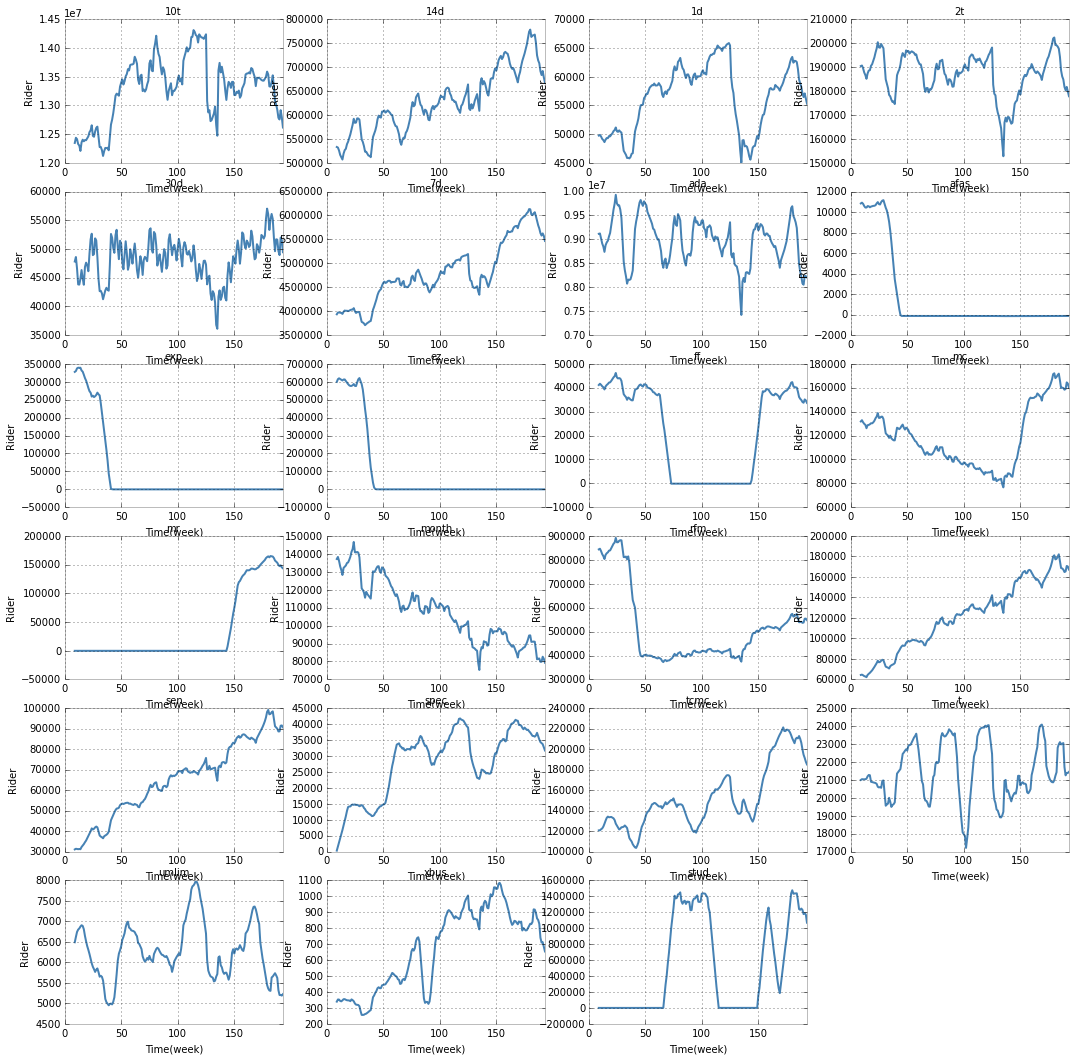

In [107]:
fig = plt.figure(figsize=(25,25))

for i in range(0,23):
    
    ax = fig.add_subplot(6,4,i+1)
    ax = pd.rolling_mean(mta_allsta_t[i], 10).plot(figsize=(18,18))

    ax.set_title(ridetype[i], fontsize=10)
    pl.xlabel("Time(week)", fontsize=10)
    pl.ylabel("Rider", fontsize=10)

    i += 1

pl.figure()

####According to the plots above, we may conclude that:
the ridetypes with steadly increase in popularity are '14d','7d','rr','sen','spec','tcmc','xbus';  
the ridetypes with steadly decrease in popularity are 'month'.


In [140]:
for i in range(0,23):
    roll_mean = pd.rolling_mean(mta_allsta_t[i], 10).dropna()


    #print (roll_mean)

    ratio = roll_mean[9]/roll_mean[193]
    std = np.std(roll_mean)
    first10 = roll_mean[9]/roll_mean[19]#start from the one which is not nan
    last10 = roll_mean[183]/roll_mean[193]

    print (ridetype[i])
    print ('std:',std,'flux ratio beginning to end',ratio)
    print ('first 10 flux ratio',first10,'last 10 flux ratio',last10)
    
    i +=1

10t
std: 546777.521277 flux ratio beginning to end 0.978666901854
first 10 flux ratio 0.996138620133 last 10 flux ratio 1.06283712645
14d
std: 64592.6848679 flux ratio beginning to end 0.798639895316
first 10 flux ratio 0.979577522875 last 10 flux ratio 1.14848748038
1d
std: 5769.15820691 flux ratio beginning to end 0.89957174183
first 10 flux ratio 1.00281326264 last 10 flux ratio 1.13440328578
2t
std: 8830.94071264 flux ratio beginning to end 1.07094756419
first 10 flux ratio 0.995918877362 last 10 flux ratio 1.11678814061
30d
std: 3626.01841777 flux ratio beginning to end 0.967238216215
first 10 flux ratio 1.00423163753 last 10 flux ratio 1.13485993766
7d
std: 631954.860977 flux ratio beginning to end 0.719548158964
first 10 flux ratio 0.983389346744 last 10 flux ratio 1.10517889618
ada
std: 473488.635714 flux ratio beginning to end 1.11130896299
first 10 flux ratio 0.997925252685 last 10 flux ratio 1.14054981908
afas
std: 3796.06815926 flux ratio beginning to end -80.0302583026
fir

##to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
##an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

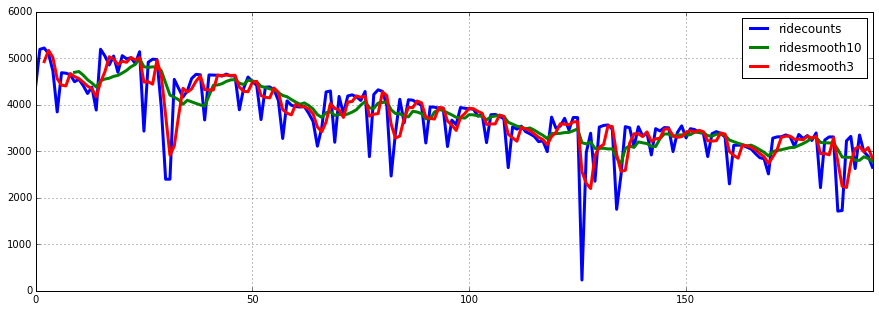

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

#Task 3

###For each ridertype, since there are only 23 rider types, it is easy to find out the top 4 with the most prominent periodic trend by observation.

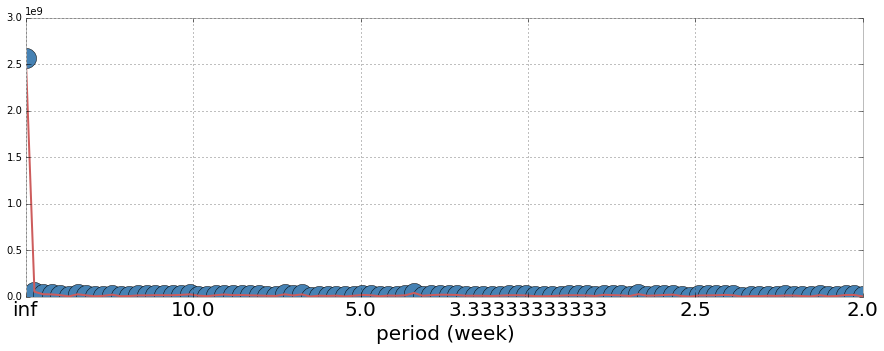

In [74]:
mta_allsta = pd.DataFrame(mta_allsta)
f = np.abs(np.fft.rfft(mta_allsta.loc[0,:]))
#print (f)
#print (np.fft.rfftfreq(194, 1.0))
      

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
sample_rate = 1.0
ax.plot(np.fft.rfftfreq(194, 1.0), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(194, 1.0), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)

#x = np.arange(0,N/2,period)
#sinewave = np.sin(x)
#ax.plot(x, sinewave, '.', ms=50, label= "period = %.1f"%period)
#ax.plot(x, sinewave, '-', label = "sine wave")

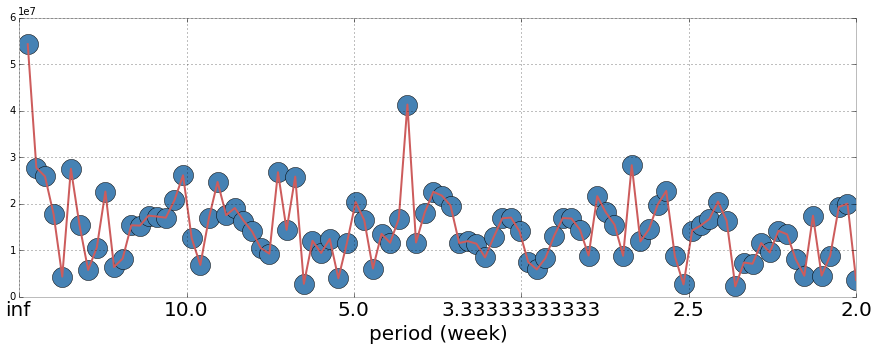

In [182]:
f = np.abs(np.fft.rfft(mta_allsta.loc[0,:]))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
sample_rate = 1.0
ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms=20)
ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)

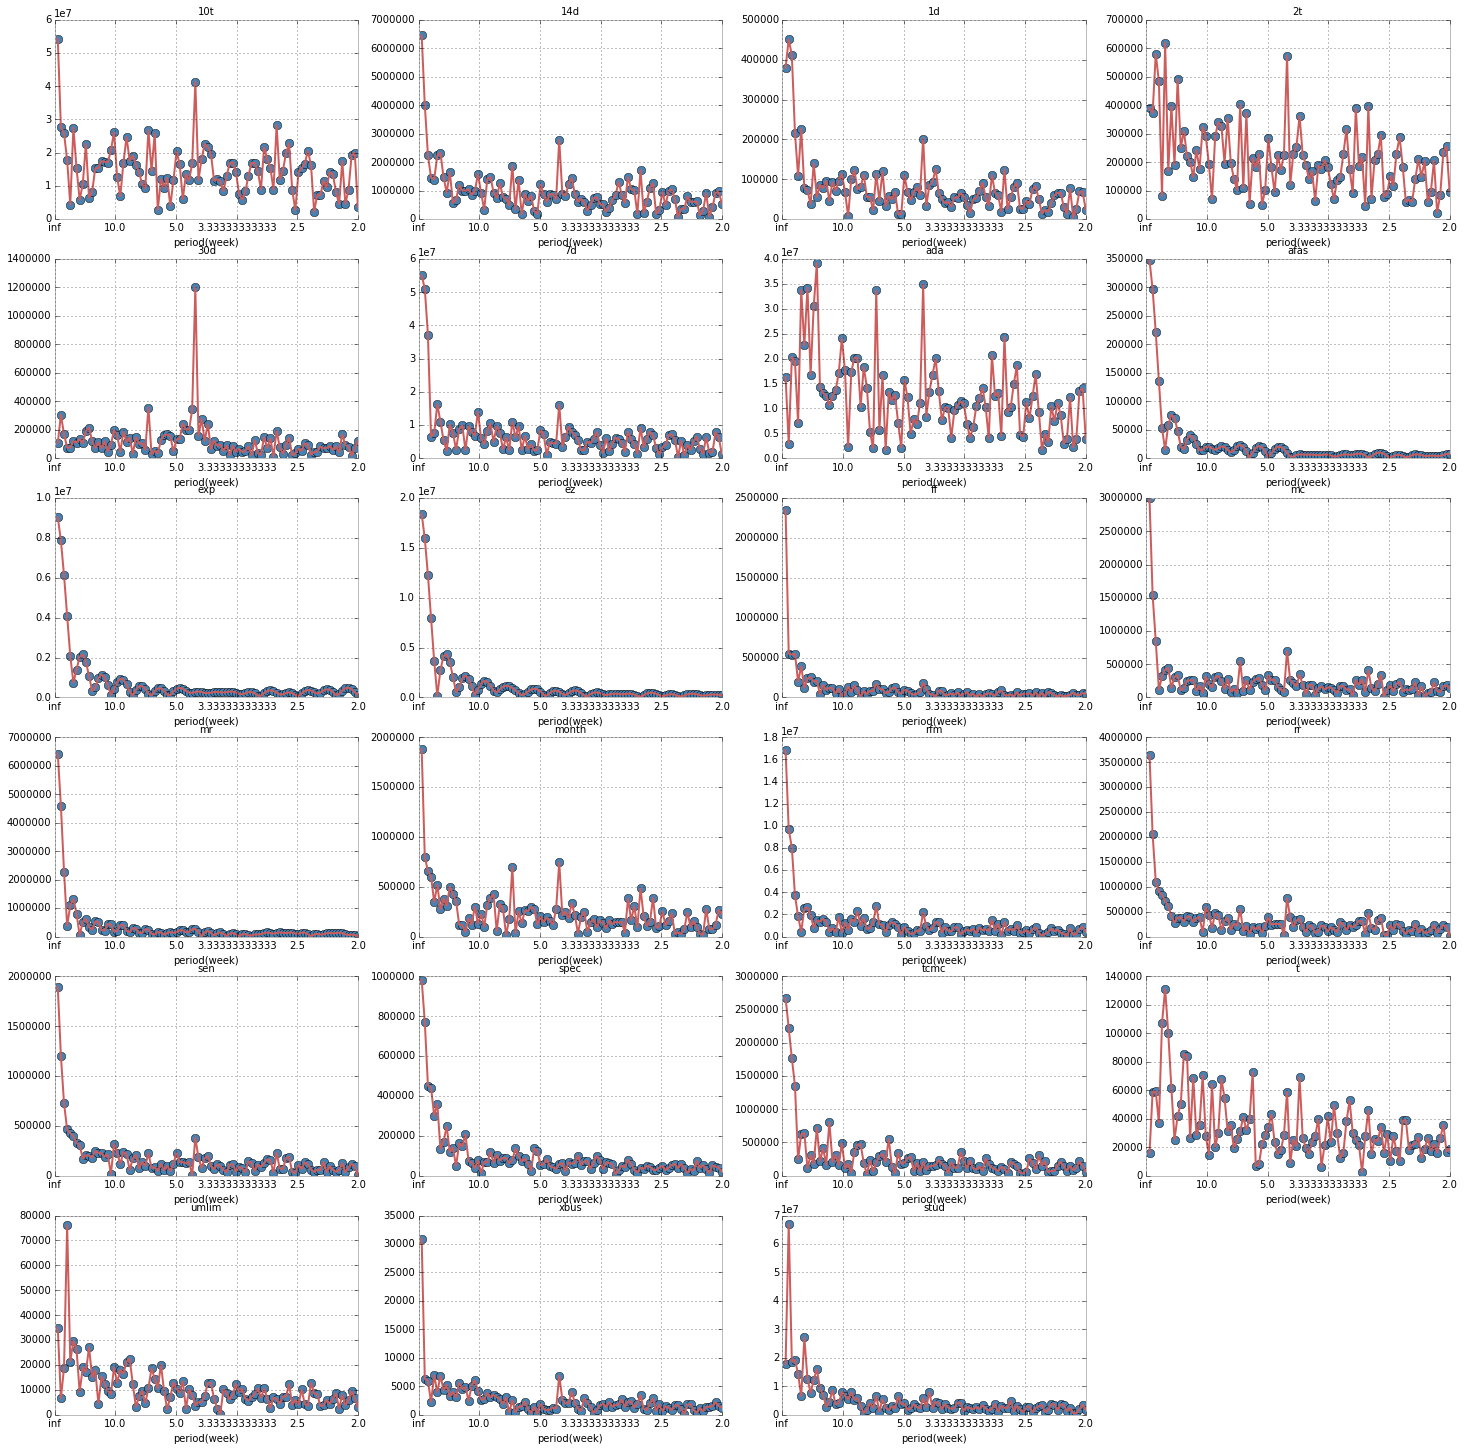

In [190]:
fig = plt.figure(figsize=(25,25))

for i in range(0,23):
    
    ax = fig.add_subplot(6,4,i+1)
    f = np.abs(np.fft.rfft(mta_allsta.loc[i,:]))#frequency
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms=8)
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=10)#period = 1/frequency

    ax.set_title(ridetype[i], fontsize=10)
    pl.xlabel("period(week)", fontsize=10)

    i += 1

pl.figure()

###For ridertype, '7d','10t','ada','stu' are the top 4 with the most prominent periodic trend.

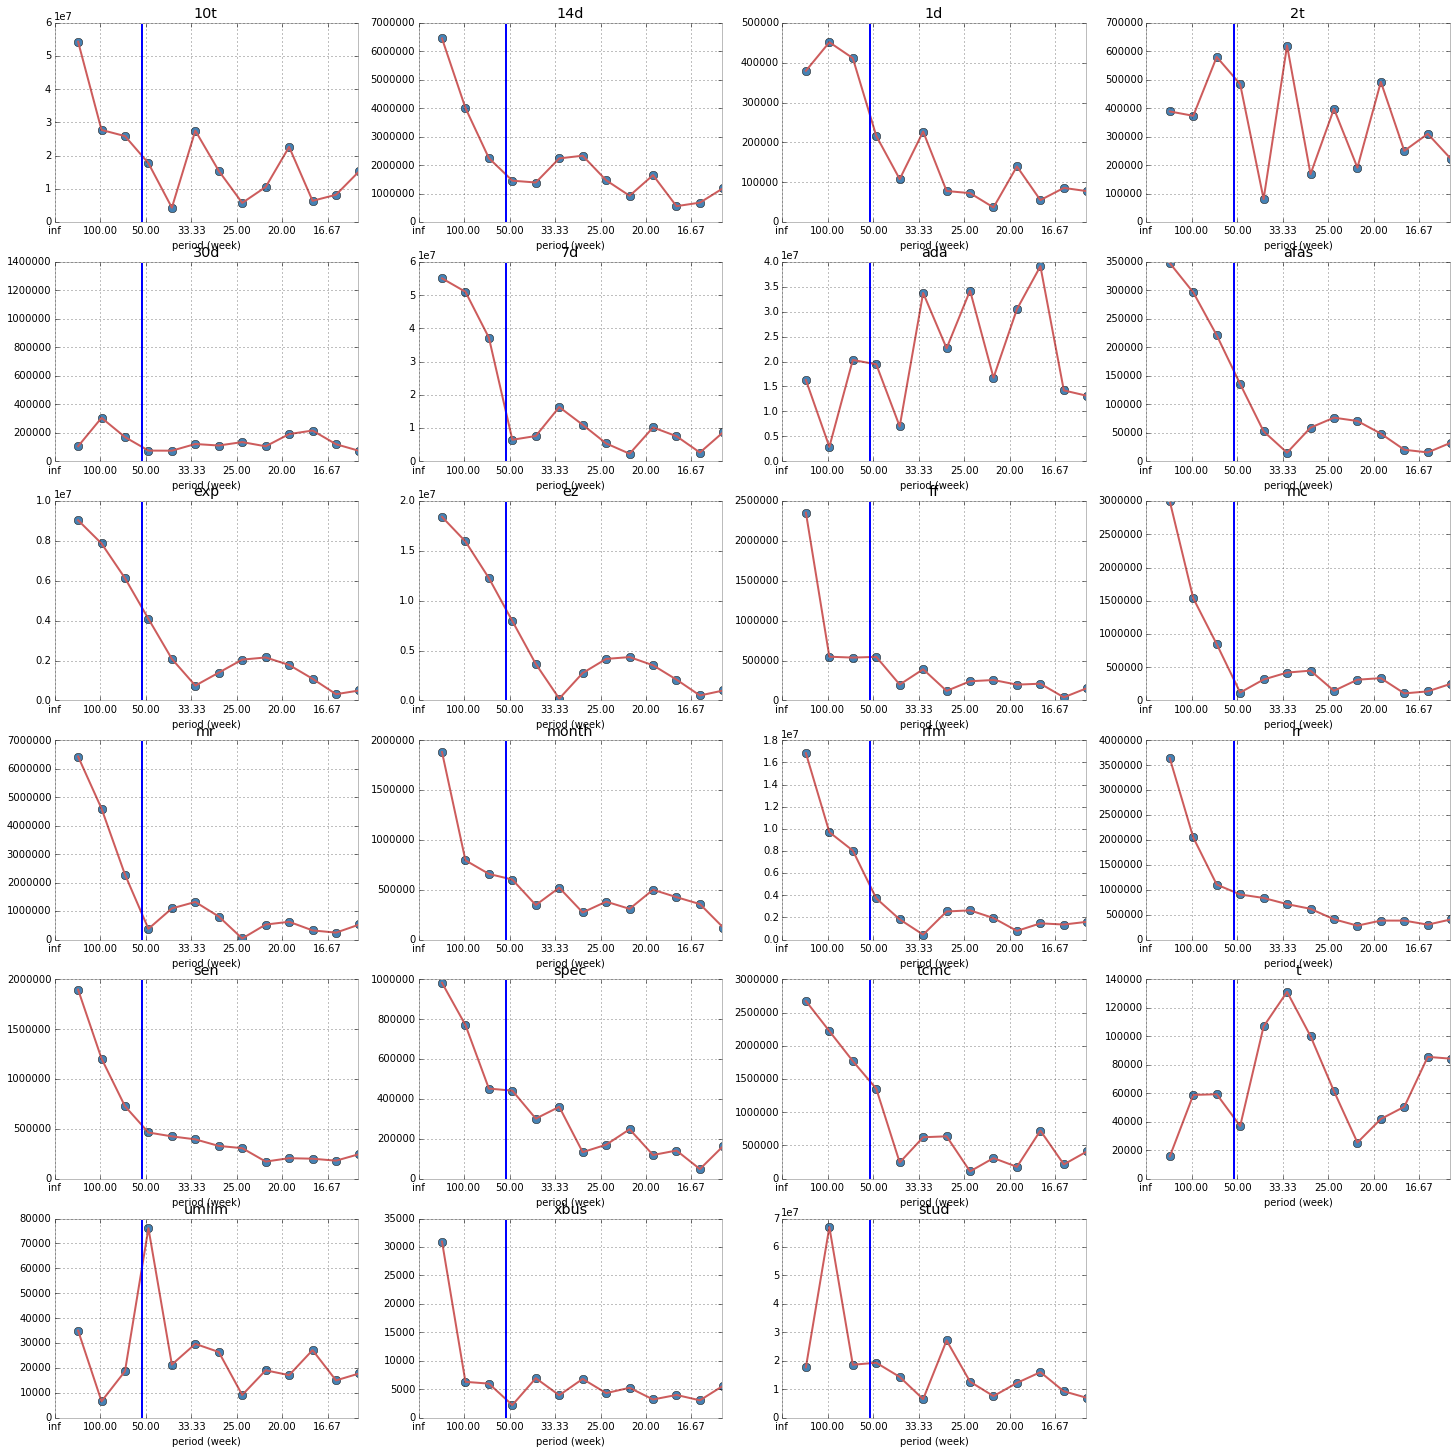

In [188]:
fig = plt.figure(figsize=(25,25))

for i in range(0,23):
    
    ax = fig.add_subplot(6,4,i+1)
    f = np.abs(np.fft.rfft(mta_allsta.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms=8)
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    ax.set_xticklabels([ "%.2f"%(1/f) for f in ax.get_xticks()], fontsize=10)
    pl.xlabel("period (week)", fontsize=10)
    plt.axvline(1.0/52)
    ax.set_title(ridetype[i])
    
    i += 1

pl.figure()

###For each stations, it is much harder to find out the top 4 the most prominent periodic trend by eyes.

In [75]:
mta_alltype = np.nansum(mta, axis=1)
print (mta_alltype.shape)
print (mta_alltype.shape[0])

(600, 194)
600


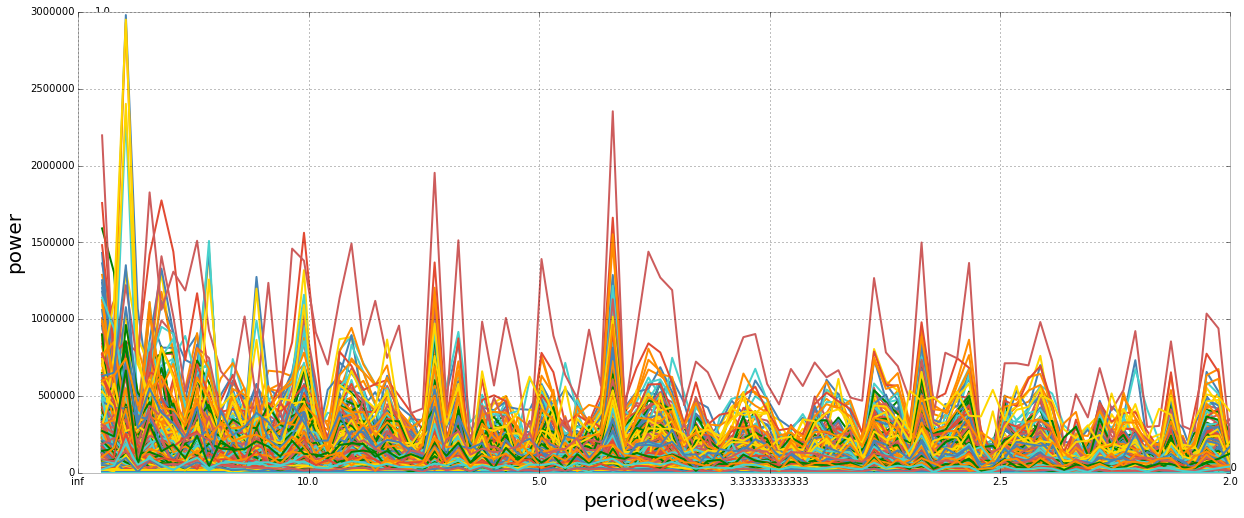

In [76]:
mta_eachsta = pd.DataFrame(mta_alltype)
fig = figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
pl.xlabel('period(weeks)', size=20)
pl.ylabel('power', size=20)

for i in range(mta_alltype.shape[0]):
    f = np.abs(np.fft.rfft(mta_alltype[i]))
    ax.plot(np.fft.rfftfreq(194,1.0)[2:],(f)[2:],'-',label = mta_eachsta.index[i])

    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=10)
#ax.legend(loc = 'right')
#sorry the label is too long
#print (f)
#print (mta_eachsta.index)

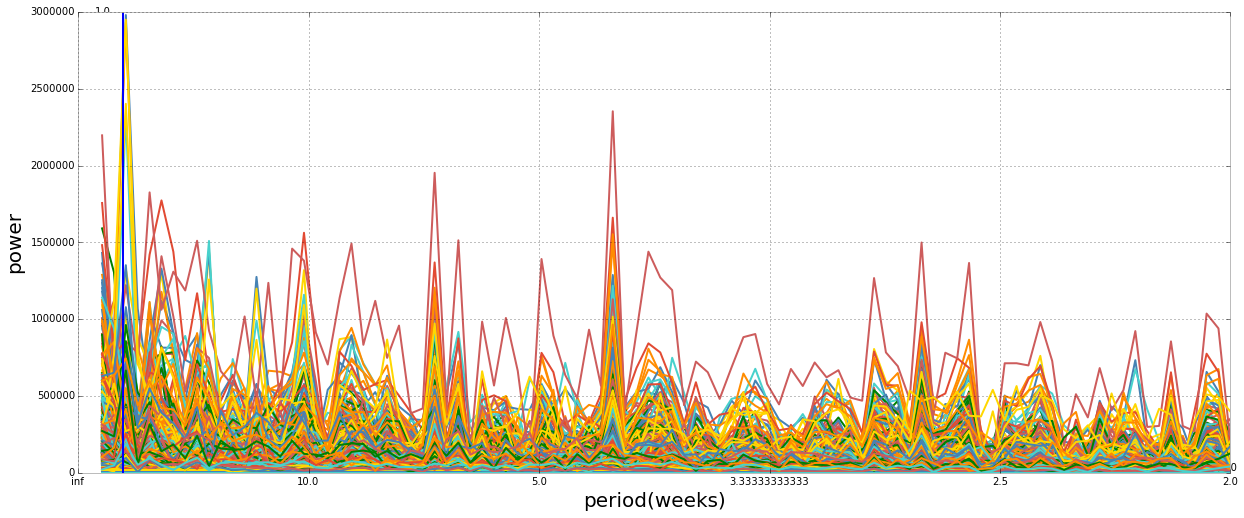

In [299]:
fig = figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
pl.xlabel('period(weeks)', size=20)
pl.ylabel('power', size=20)

for i in range(mta_alltype.shape[0]):
    f = np.abs(np.fft.rfft(mta_alltype[i]))
    ax.plot(np.fft.rfftfreq(194,1.0)[2:],(f)[2:],'-',label = mta_eachsta.index[i])

    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=10)

    plt.axvline(1.0/52)


In [52]:
mta_eachsta.T.describe()

0             1            2             3             4    \
count     194.000000    194.000000   194.000000    194.000000    194.000000   
mean   119380.969072  20662.515464  7244.139175  19017.634021  20371.567010   
std     37100.902814  18701.909786   982.014851   3163.827639   2451.491883   
min         0.000000      0.000000  1108.000000   3334.000000   3564.000000   
25%     94730.250000      0.000000  6697.250000  17216.750000  19157.000000   
50%    128329.000000  28923.500000  7222.500000  18346.500000  20462.500000   
75%    147481.500000  39135.750000  7806.750000  21362.250000  22130.250000   
max    173971.000000  49359.000000  8924.000000  24786.000000  24332.000000   

                5             6             7             8              9    \
count    194.000000    194.000000    194.000000    194.000000     194.000000   
mean   22270.675258  13857.561856  12894.072165  11319.798969  191203.376289   
std     2805.082111   1620.103223   2088.187492   1404.892397   26800.154689   
min     3779.000000   2202.000000   1961.000000   2003.000000   46761.000000   
25%    20824.250000  13074.250000  11725.750000  10676.250000  176290.750000   
50%    22569.500000  13949.000000  12567.000000  11423.000000  197427.000000   
75%    24034.500000  15071.250000  14245.750000  12094.250000  211216.250000   
max    27645.000000  16446.000000  17103.000000  14383.000000  230702.000000   

      ...   590  591  592  593  594  595  596  597  598  599  
count ...   194  194  194  194  194  194  194  194  194  194  
mean  ...     0    0    0    0    0    0    0    0    0    0  
std   ...     0    0    0    0    0    0    0    0    0    0  
min   ...     0    0    0    0    0    0    0    0    0    0  
25%   ...     0    0    0    0    0    0    0    0    0    0  
50%   ...     0    0    0    0    0    0    0    0    0    0  
75%   ...     0    0    0    0    0    0    0    0    0    0  
max   ...     0    0    0    0    0    0    0    0    0    0  

[8 rows x 600 columns]

In [100]:
def ave(DataFrame):
    return mean(DataFrame)

a = ave(mta_eachsta.T)
#print (a[169])

629416.206186


In [91]:
b = sorted(a)
print (b)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0051546391752577319, 0.0051546391752577319, 0.025773195876288658, 20.195876288659793, 100.34020618556701, 1090.6185567010309, 1236.3865979381444, 1288.1494845360826, 1818.1958762886597, 2647.3865979381444, 3028.3144329896909, 3664.680412371134, 3768.1185567010311, 4023.319587628866, 4718.1649484536083, 4880.4123711340208, 5317.432989690722, 5628.1958

In [101]:
print (np.where(a==629416.20618556696)[0])
print (np.where(a==404874.65979381441)[0])
print (np.where(a==395005.80412371136)[0])
print (np.where(a==393564.3092783505)[0])

[169]
[21]
[45]
[83]


###According to the summary above, station169, station21, station45 and station 83 are the top 4 stations with the most prominent periodic trend.

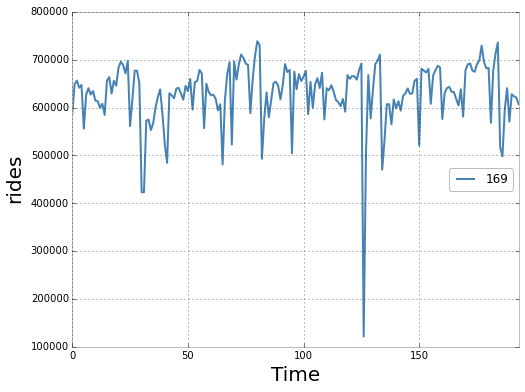

In [97]:
mta_eachsta.loc[169].plot(figsize=(8,6))
plt.legend(loc = 'right')
pl.ylabel("rides", fontsize=20)
pl.xlabel("Time", fontsize=20)

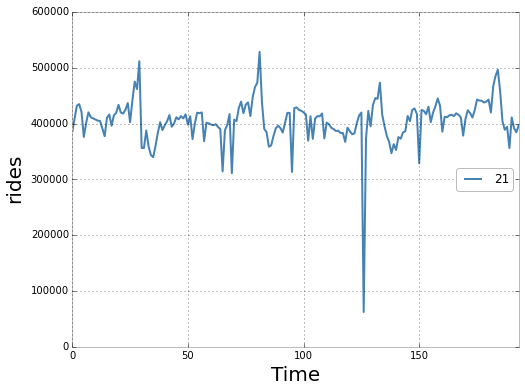

In [102]:
mta_eachsta.loc[21].plot(figsize=(8,6))
plt.legend(loc = 'right')
pl.ylabel("rides", fontsize=20)
pl.xlabel("Time", fontsize=20)

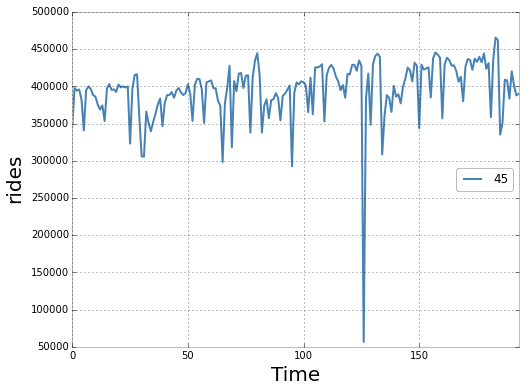

In [103]:
mta_eachsta.loc[45].plot(figsize=(8,6))
plt.legend(loc = 'right')
pl.ylabel("rides", fontsize=20)
pl.xlabel("Time", fontsize=20)

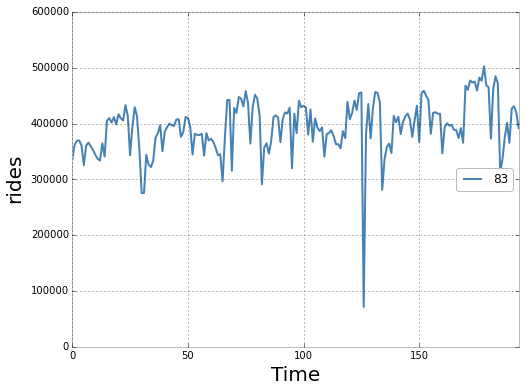

In [104]:
mta_eachsta.loc[83].plot(figsize=(8,6))
plt.legend(loc = 'right')
pl.ylabel("rides", fontsize=20)
pl.xlabel("Time", fontsize=20)